# Single qubit unitaries

In this challenge, you will learn how to apply a series of unitaries to prepare particular final states.

Firstly, some functions and packages will be important. These will be explained throught the challenge.

In [ ]:
from pyquil import Program
from pyquil.api import WavefunctionSimulator
from pyquil.gates import *
import sys
sys.path.insert(0, 'tests/')
sys.path.insert(0, 'auxiliary_functions/')

from test_single_qubit_unitaries import *

from auxiliary_functions.auxiliary_unitaries import plus_prep, minus_prep, one_prep

## <font color='red'>Task 1 :</font>  Bit flip

Here you should perform a simple bit flip operation. Do you remember the gates introduced in the introductory session on the first day?

#### Inputs: 
State prepared in the 0 computational basis state: |0> 

#### Task: 
Prepare a state in the orthogonal state: |1>

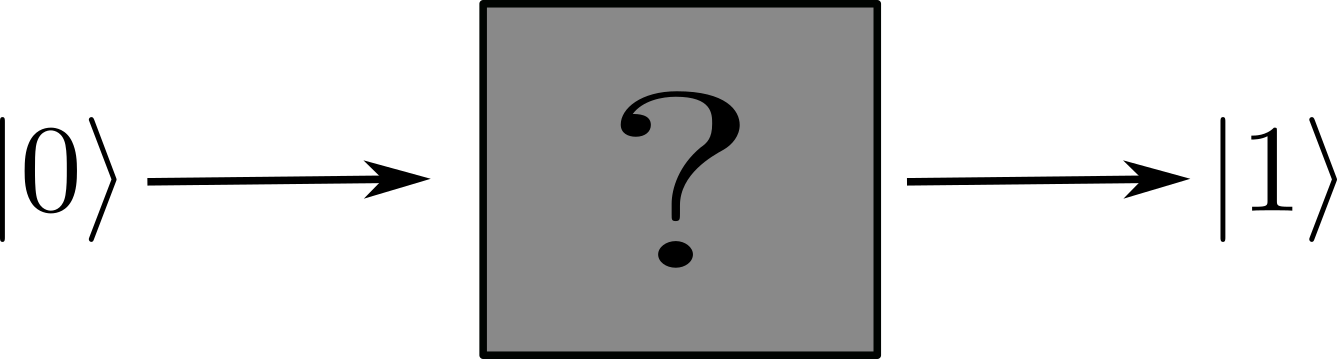

In [ ]:
# Initialise an empty circuit: 
circuit = Program()

# The circuit now contains a quantum register in the state |0>.
# Apply a unitary gate (or gates) such that the output state is |1>

# circuit += # Add gates here

# You can check if the output state is correct by printing 
# out the wavefunction of the state using a simulator.
make_wf = WavefunctionSimulator()

wavefunction = make_wf.wavefunction(circuit)
print('The wavefunction is:', wavefunction)

Now you can run the following quick test.

In [ ]:
test_bit_flip_unitary(circuit)

## <font color='red'>Task 2:</font> Superposition Preparation
Here you shoulrd prepare a state which is in a _super position_ of $|0>$ and $|1>$.

#### Inputs:
Initial state prepared the computational basis state: $|0>$

#### Task:
Prepare the qubit in the *superposition* state: $|+> = \frac{1}{\sqrt{2}}\left(|0> + |1> \right)$

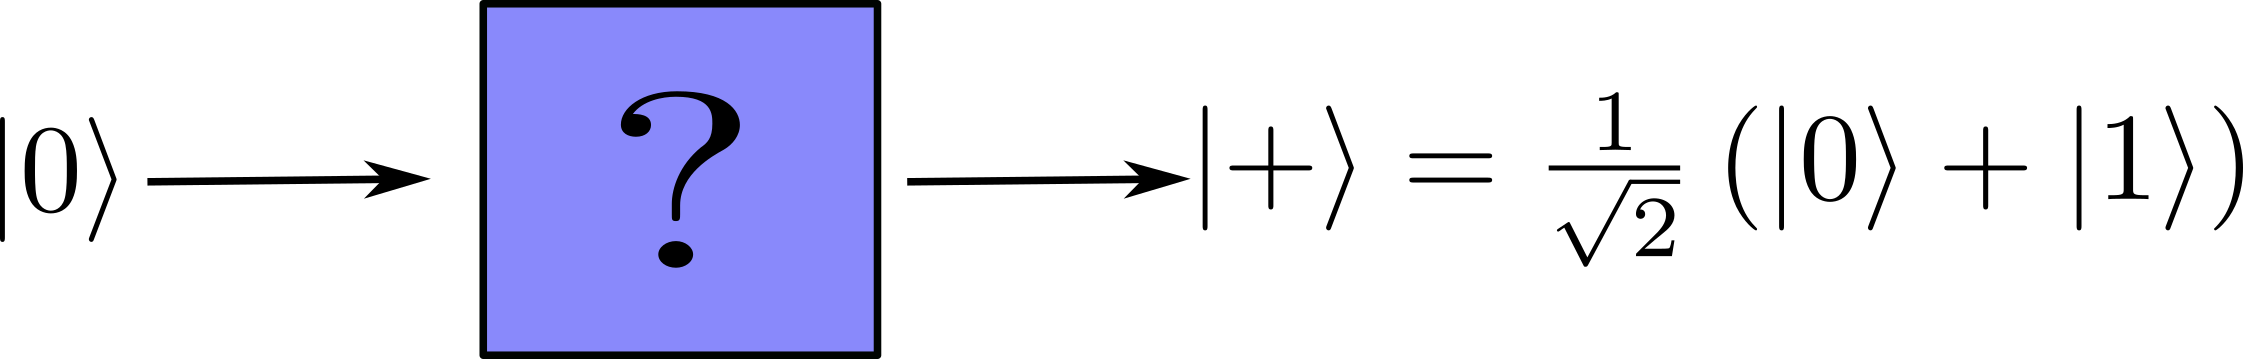

In [ ]:
# Initialise an empty circuit: 
circuit = Program()

# The circuit now contains a quantum register in the state |0>.
# Apply a unitary gate (or gates) such that the output state is |+>

# circuit += # Add gates here

# You can check if the output state if correct by printing 
# out the wavefunction of the state using a simulator.
make_wf = WavefunctionSimulator()

wavefunction = make_wf.wavefunction(circuit)
print('The wavefunction is:', wavefunction)

Run test to check if correct state was obtained

In [ ]:
# Run test to check if correct state was obtained
test_superposition_unitary(circuit)

## <font color='red'>Task 3:</font>  Reversal
In this case you will be give a state which is not prepared in the computational 
basis, instead it is prepared in the _Hadamard basis_, $|+>$

#### Inputs:
Initial state prepared in the basis state: $|+>$

#### Task:
Return state to the computational basis state: $|0>$


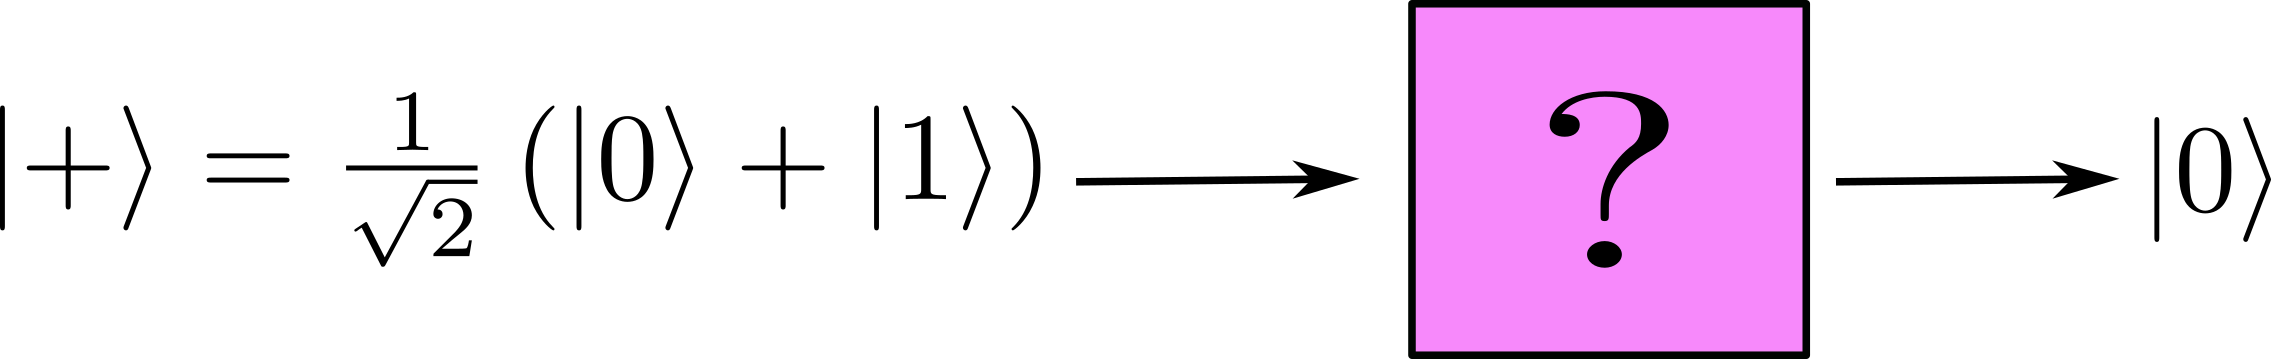

In [ ]:
# Initialise a |+> state: 
circuit = plus_prep()

# The circuit now contains a quantum register in the state |+>.
# Apply a unitary gate (or gates) such that the output state is |0>

circuit += #Your code here

# (Again, if you wish you can print out the wavefunction to check how you are doing)

Now test that the correct circut has been created

In [ ]:
test_plus_input_to_zero(circuit)

## <font color='red'>Task 4:</font> Reversal + Flip.


#### Inputs:
Initial state prepared in the basis state: $|-\rangle$

#### Task:
Return state to the computational basis state: $|0\rangle$

*Hint: You may need to apply more than one gate.*

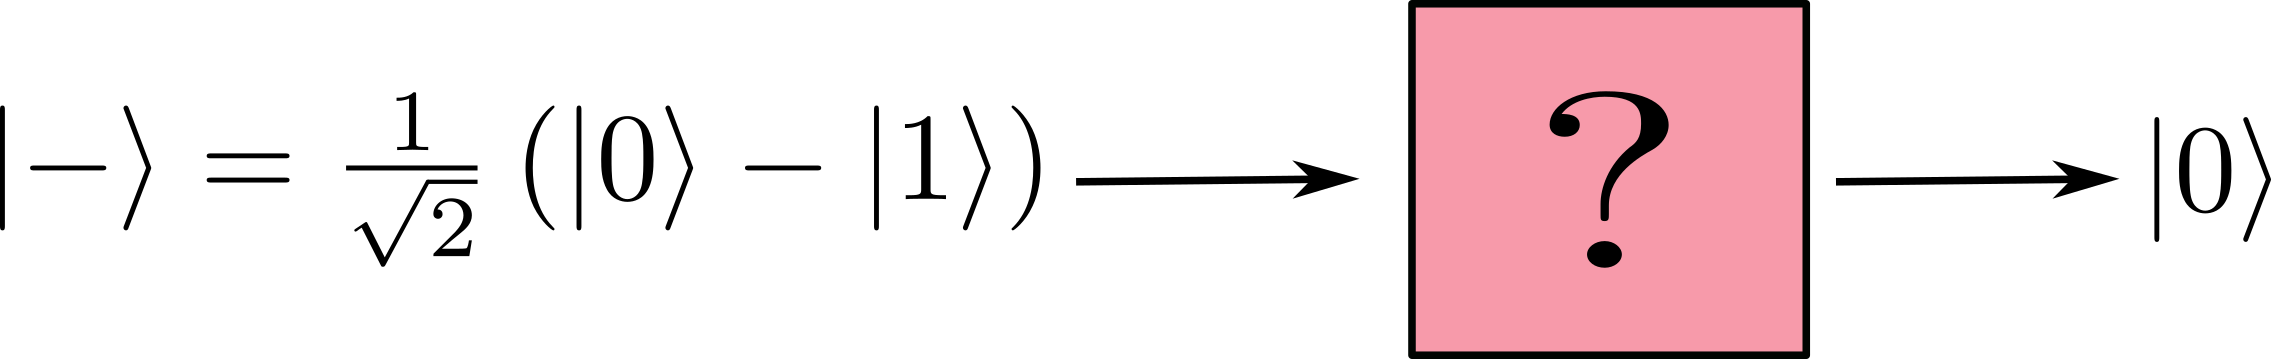

In [ ]:
# Initialise a |-> state: 
circuit = minus_prep()

# The circuit now contains a quantum register in the 
# state: |-> = 1/\sqrt(2)(|0> - |1>).
# Apply a unitary gate (or gates) such that the output state is |0>

circuit += # Apply Gates here

Let's test the code again


In [ ]:
test_minus_input_to_zero(circuit)

## <font color='red'>Task 5:</font> Phases


Finally, we will look at how to create 'phases', which are factors of $e^{i\theta}$ for some angle $\theta$.

Phases can typically be 
   1. 'Global' - they factor out of the wavefunction and just become a scalar multiple, i.e.:
       
       $e^{i\theta}\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$.
       
   2. 'Relative' (or Local)  - they apply to some parts of the state but not to others
       i.e a $-1$ phase difference between the states:
       
       $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right), |-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$
       
We typically ignore global phases, they are not 'observable' in the sense that they cannot be determined by a measurement. This is because the thing we observe in experiments are probabilities, $|\langle\phi|\psi\rangle|^2$, which are real numbers, and not the 'amplitudes', $\langle\phi|\psi\rangle$, which can be complex.

In the probabilies, global phases cancel each other out. Say we have $|\psi\rangle$ and $|\psi_\theta\rangle =  e^{i\theta}|\psi\rangle$, which correspond to the same ***physical state***. Then have:

\begin{align}
 |\langle\phi|\psi_\theta\rangle|^2 = \langle\phi|\psi_\theta\rangle\langle\psi_\theta|\phi\rangle =  e^{i\theta}e^{-i\theta}\langle\phi|\psi\rangle\langle\psi|\phi\rangle = \langle\phi|\psi\rangle\langle\psi|\phi\rangle = |\langle\phi|\psi\rangle|^2
\end{align}

***However*** the same is not true for *relative* phases; the states $|+\rangle, |-\rangle$ are very different, and of course we can observe the difference between these states (by measuring in a correct basis, as we will see later). 

In fact, the reason we get computational speedups in Quantum Algorithms is exactly because of this fact - the local phases mean that certain states in a particular computation can ***interfere*** and cancel each other out. 

If smart enough, we can engineer this 'cancellation' to happen for the incorrect solutions to a problem, so the 'correct' solutions get a boost and we can find them more easily.

## <font color='blue'>Global Phase:</font> 

#### Inputs:
Initial state prepared in the basis state: $|1\rangle$

#### Task:
Apply a phase (of -1) to this state to get: $-|1\rangle$



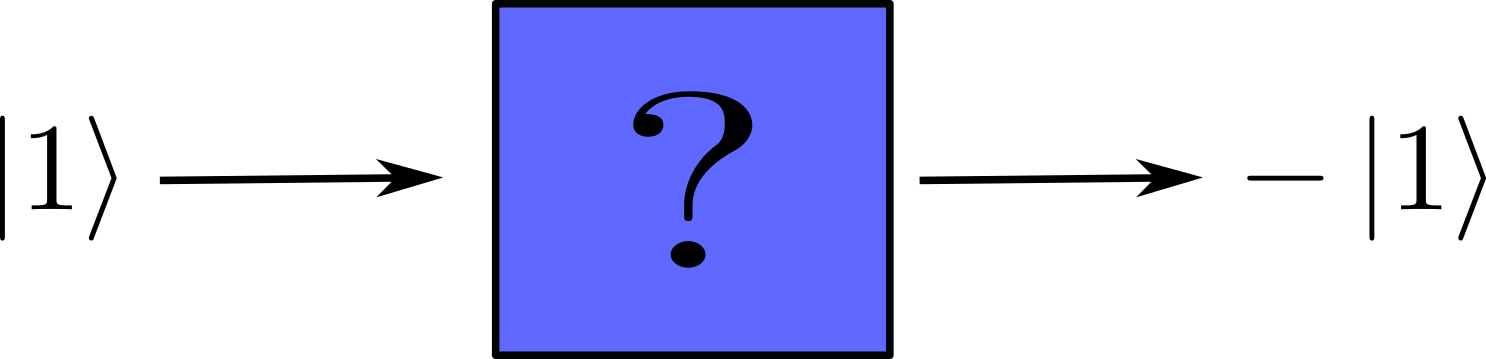

In [ ]:
circuit = one_prep()
# The circuit now contains a quantum register in the state: |1>.
# Apply a unitary gate (or gates) such that the output state is -|1>

circuit += # Apply Gates here

Let's test the code again

In [ ]:
test_one_phase(circuit)

## <font color='green'>Relative Phase:</font> 

#### Inputs:
Initial state prepared in the basis state: $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$

#### Task:
Apply a *relative* phase (of $e^{i \theta}, \theta = \frac{\pi}{3}$) to this state to get:

$|\phi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+e^{i \pi/3}|1\rangle\right)$



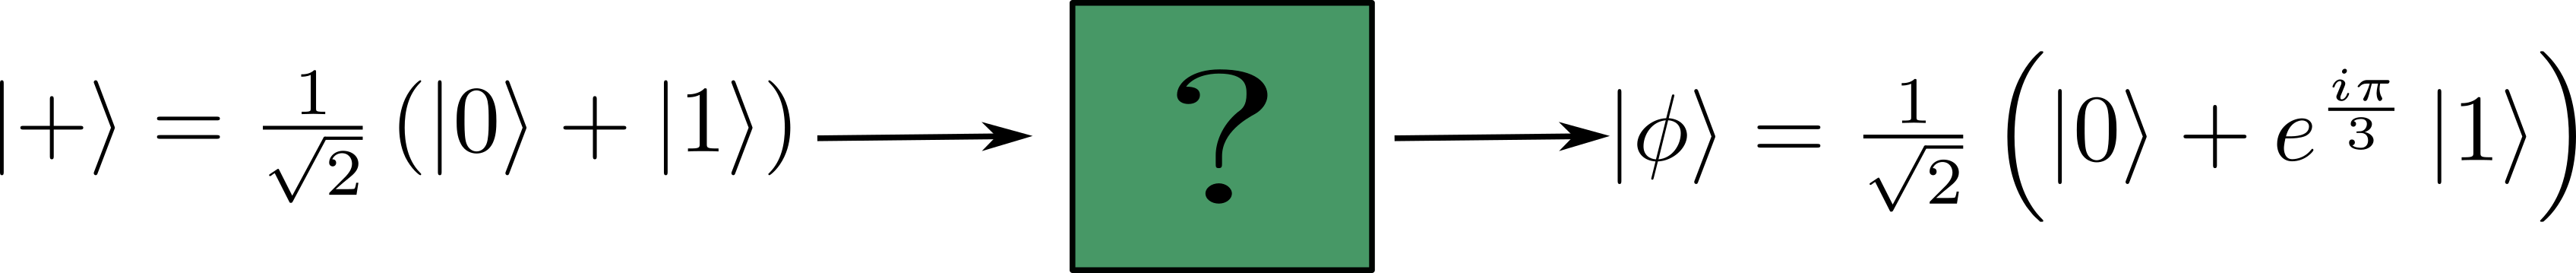

In [ ]:
circuit = plus_prep()

# The circuit now contains a quantum register in the 
# state: |+> = 1/\sqrt(2)(|0> + |1>).
# Apply a unitary gate (or gates) such that the output state is |phi> = 1/\sqrt(2)(|0> + e^{i\pi/3}|1>)

circuit += # Apply Gates here

In [ ]:
test_pi_three_phase(circuit)

In [ ]:
import numpy as np

from pyquil import Program
from pyquil.quil import DefGate

# First we define the new gate from a matrix
sqrt_x = np.array([[1,  1],
                   [ 1,  1]])

# Get the Quil definition for the new gate
sqrt_x_definition = DefGate("SQRT-X", sqrt_x)
# Get the gate constructor
SQRT_X = sqrt_x_definition.get_constructor()

# Then we can use the new gate
p = Program()
p += sqrt_x_definition
p += SQRT_X(0)
print(p)